<a href="https://colab.research.google.com/github/KBLin1996/Advertise_Click_Prediction/blob/master/introduction_to_python_pytorch_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Python, Pytorch and Plotting**

In our class we will be using Google Colab / Jupyter notebooks and python for the assignments so it is important to be confident with both ahead of time. We will additionally be using a matrix (tensor) manipulation library similar to numpy called pytorch. We will learn during the class why pytorch is much more than a matrix maninpulation package but for the purposes of this tutorial we will just use it as a convenient tool for array/matrix/tensor manipulation.

In [ ]:
import torch  # This imports the torch library.
import matplotlib
import matplotlib.pyplot as plt  # This is python's popular plotting library.

### **1. Creating, Indexing, and Displaying 2D Tensors (Matrices)**
The main data structure you have to get yourself familiar during this course is the pytorch Tensor, or put simply, a multidimensional array. We will create here a few tensors, manipulate them and display them. The indexing operations inside a tensor in pytorch is similar to indexing in numpy.

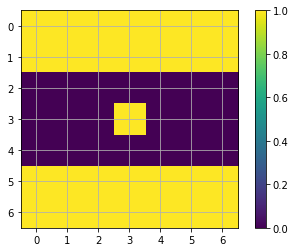

In [ ]:
myTensor = torch.zeros(7, 7, dtype=torch.float)
myTensor[:, :] = 0   # Assign zeros everywhere in the matrix.
myTensor[3, 3] = 1   # Assign one in position 3, 3
myTensor[:2, :] = 1   # Assign ones on the top 2 rows.
myTensor[-2:, :] = 1    # Assign ones on the bottom 2 rows.

# Show the tensor.
def showTensor(aTensor):
    matplotlib.rc('image', cmap = 'viridis') # Colorful colormap.
    plt.figure()
    plt.imshow(aTensor)
    plt.colorbar()
    plt.grid('off')
    plt.show()
    
showTensor(myTensor)

If you are familiar with numpy indexing then everything above should look familiar. We can access and modify the tensor using indexing of single elements myTensor[index1, index2], or ranges of indices myTensor[index1_1 : index1_2, index2_1 : index2_2]. Notice that the indices could contain positive or negative values, where negative values index counting from end to beginning. Also notice that we can convert a pytorch tensor to a numpy array easily using the .numpy() method.

**Exercise: ** Use indexing operations to generate the following patterns:

![alt text](http://www.cs.virginia.edu/~vicente/recognition/notebooks/plt3.png)
![alt text](http://www.cs.virginia.edu/~vicente/recognition/notebooks/plt1.png)
![alt text](http://www.cs.virginia.edu/~vicente/recognition/notebooks/plt2.png)

I also strongly recommend you to look over the definitions of the index(), index_add_(), index_fill(), index_fill_(), index_copy_(), index_select(), scatter_(), and gather() operations, as you will see them in other people's code, and maybe you will find them useful for your own projects.



### **2. Reshaping, Slicing, and Cloning Tensors.**
We will also be often needing to extract subsections of a tensor or reshaping the tensor in different ways. Here are examples for a couple of useful operations.

In [ ]:
# This creates one-dimensional tensor (array)
myTensor = torch.tensor([1, 2, 3, 4], dtype=torch.float)
print(myTensor)
print(myTensor.size())

tensor([1., 2., 3., 4.])
torch.Size([4])


In [ ]:
# This copies the one-dimensional array 5 times on dimension 1
extendedTensor = myTensor.repeat(5, 1)
print(extendedTensor)
print(extendedTensor.size())

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])
torch.Size([5, 4])


In [ ]:
slicedTensor = extendedTensor[3, :]
slicedTensor[:] = 5
print(slicedTensor)
print(slicedTensor.size())
print(extendedTensor)

tensor([5., 5., 5., 5.])
torch.Size([4])
tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [5., 5., 5., 5.],
        [1., 2., 3., 4.]])


Notice how in the above example the slicedTensor still points to the original content of extendedTensor, modifying its values also modifies the contents in extendedTensor. If you wanted to rather create a copy of the values in the slice you can always use the .clone() method.

You can review other tensor operations in pytorch's documentation here: http://pytorch.org/docs/master/tensors.html

Other functions I often find useful besides repeat(), and clone(), are: view(), squeeze(), unsqueeze(), transpose(), and permute().

**Excercise:** Run some examples to see what view(), squeeze(), unsqueeze(), transpose(), and permute() can do for you.


### **3. Tensor Operations**
Basic tensor operations include scalar, tensor multiplication, and addition. It also includes element-wise tensor-tensor operations, and other operations that might be specific to 2D tensors (matrices) such as matrix-matrix multiplication. Two things to notice 1) Basic operators have been overloaded so sometimes it is not needed to explicitly call a torch function 2) Many torch operations have an in-place version that operates in the same space of an input tensor as opposed to returning a new one, we show some examples below:

In [ ]:
# Adding a scalar to a tensor:
inputTensor = torch.Tensor([[1, 2], [3, 4]])
print(inputTensor.add(1))
print(inputTensor)

tensor([[2., 3.],
        [4., 5.]])
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# Adding a scalar to a tensor (in-place):
inputTensor = torch.Tensor([[1, 2], [3, 4]])
# In-place operations usually are followed by underscore _
print(inputTensor.add_(1))  
print(inputTensor)

tensor([[2., 3.],
        [4., 5.]])
tensor([[2., 3.],
        [4., 5.]])


The above code should show the difference between in-place operations, similarly there are mul(), and div() methods.

The following code shows tensor-tensor operations.

In [ ]:
myTensor1 = torch.zeros(3, 2, 2).fill_(2)
myTensor2 = torch.zeros(3, 2, 2).fill_(3)
print(myTensor1 + myTensor2)
print(myTensor1 * myTensor2)
# .addcmul(c, a, b) performs c + a .* b (Where .* means element-wise multiplication)
print(torch.addcmul(myTensor1, myTensor1, myTensor2))

tensor([[[5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.]]])
tensor([[[6., 6.],
         [6., 6.]],

        [[6., 6.],
         [6., 6.]],

        [[6., 6.],
         [6., 6.]]])
tensor([[[8., 8.],
         [8., 8.]],

        [[8., 8.],
         [8., 8.]],

        [[8., 8.],
         [8., 8.]]])


Other useful tensor-tensor operations are addcmul_() [in place version of addcmul()], matmul() (tensor-tensor multiplication), mm() (matrix multiplication), mv() (matrix-vector multiplication).

### **4. GPU Computing**
A powerful feature of Pytorch is that we can run operations on the GPU simply by first moving matrices or vectors (tensors) in and out of GPU memory. See example below.

In [ ]:
import torch
import time

deviceGPU = torch.device('cuda')

# Let's create two matrices of size dxd and full of random values.
d = 5000
a = torch.rand(d, d)
b = torch.rand(d, d)

# Compute a multiplication between the two matrices in CPU.
start_time = time.time()
output = torch.mm(a,b)  # Regular multiplication in CPU.
cpu_time = time.time() - start_time
print('CPU-time {0:.6f}s'.format(cpu_time))

# Compute a multiplication between the two matrices in GPU.
start_time = time.time()
a = a.to(deviceGPU) # Move to GPU.
b = b.to(deviceGPU) # Move to GPU.
output = torch.mm(a,b)  # Multiplication happens in GPU.
gpu_time = time.time() - start_time
print('GPU-time {0:.6f}s\n'.format(gpu_time))

print('CPU was {0:.2f}x times the GPU time'.format(cpu_time / gpu_time))

CPU-time 3.119798s
GPU-time 0.045453s

CPU was 68.64x times the GPU time


**Note:** Please take note that when you run the code above for the first time, it might be the case that the GPU code runs surprisingly slower than the CPU code. This can happen because the first time you run this code you pay some penalty for "warming up" the GPU. However on subsequent runs you will see how significantly faster is the GPU computation time compared to CPU computation time e.g. 64x times faster.

### **5. Gradient Computations**
Another powerful feature of Pytorch is that it keeps track of the operations being performed on tensors e.g. a torch.tensor stores the operations that have been applied to it so that we can execute gradient computations in the reverse order of the operations following the chain rule of calculus. This is often called automatic differentation (autodiff). Here we demonstrate this feature.

For instance consider the following function.

$$f(X, Y) = (x_1 - y_1)^2  + (x_2 - y_2)^2$$,

where $X = [x_1, x_2]$ and $Y = [y_1, y_2]$. Now, let's say we're interested in computing $\partial f / \partial X = [\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}]$ and $\partial f / \partial Y = [\frac{\partial f}{\partial y_1}, \frac{\partial f}{\partial y_2}]$.

If we solve for $\frac{\partial f}{\partial x_1}$, we will find that:
$$\frac{\partial f}{\partial x_1}= 2x_1 -2y_1,$$


So when $X = [1.0, 3.0]$ and $Y = [3.0, 2.0]$, we can see that ${\partial f}/ {\partial x_1} = -4$. 

In pytorch we can compute all gradients with respect to all variables involved in the computation as follows:

In [ ]:
def f(X, Y):
  return torch.sum((X - Y) ** 2)

X = torch.tensor([1.0, 3.0], requires_grad = True)
Y = torch.tensor([3.0, 2.0], requires_grad = True)

out = f(X, Y)

out.backward() # Execute chain rule of calculus to find all partial derivatives.

print(X.grad) # This should print df/dx_1, df/dx_2
#print(Y.grad) # This should print df/dy_1, df/dy_2

tensor([-4.,  2.])


**Exercise:** Given the values of $X = [1.0, 3.0]$, $Y = [3.0, 2.0]$ and $Z=[5.0, 1.0]$. Compute using pytorch and print $\partial f / \partial z_2$ given that:

$$f(X, V) = XX^\intercal - 2XV^\intercal + VV^\intercal,$$
$$ V = Y - X + U,$$
$$ U = Z - (2X - Z)^2 + (Y - 3Z)^2$$

Assume $X$, $Y$, and $Z$ are row-vectors.